In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./data/data_from_sslv.csv')
df = df.drop(['Unnamed: 0','district','data_street','facilities'], axis=1)

In [3]:
df.head()

,rooms,area,price_eur,period,cur_floor,total_floor,lift,seria,house_type,len,lon,wifi
0,2,56.0,380,30,5,6,0,Дов. дом,Каменный,56.950794,24.129151,0
1,1,36.0,230,30,8,9,1,602-я,Панельный,56.899347,24.096512,0
2,1,29.0,370,30,1,3,0,Дов. дом,Деревянный,56.963121,24.131242,0
3,1,29.0,230,30,4,4,0,Хрущ.,Кирпичный,56.913539,24.188800,0
4,1,25.0,250,30,2,3,0,Ч. дом,Кирпичный,56.942383,24.190399,0


In [6]:
train, valid = train_test_split(df, test_size=0.25, random_state=12345)

features_train = train.drop('price_eur', axis=1)
target_train = train['price_eur']
features_valid = valid.drop('price_eur', axis=1)
target_valid = valid['price_eur']

In [10]:
# model = LogisticRegression()
# model.fit(features_train, target_train) 

## One-Hot Encoding

In [12]:
df['seria'].unique()

array(['Дов. дом', '602-я', 'Хрущ.', 'Ч. дом', 'Рекон.', 'Лит. пр.',
       '103-я', 'Спец. пр.', '119-я', 'М. сем.', 'Чеш. пр.', 'Нов.',
       '104-я', 'Сталинка', '467-я'], dtype=object)

In [15]:
display(pd.get_dummies(df['seria']).head())

,103-я,104-я,119-я,467-я,602-я,Дов. дом,Лит. пр.,М. сем.,Нов.,Рекон.,Спец. пр.,Сталинка,Хрущ.,Ч. дом,Чеш. пр.
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
data_ohe = pd.get_dummies(df, drop_first=True)
target = data_ohe['price_eur']
features = data_ohe.drop('price_eur', axis=1)

In [33]:
features.head()

,rooms,area,period,cur_floor,total_floor,lift,len,lon,wifi,seria_104-я,...,seria_Спец. пр.,seria_Сталинка,seria_Хрущ.,seria_Ч. дом,seria_Чеш. пр.,house_type_Каменный,house_type_Кирпично-панельный,house_type_Кирпичный,house_type_Панельно-кирпичный,house_type_Панельный
0,2,56.0,30,5,6,0,56.950794,24.129151,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,36.0,30,8,9,1,56.899347,24.096512,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,29.0,30,1,3,0,56.963121,24.131242,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,29.0,30,4,4,0,56.913539,24.188800,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,25.0,30,2,3,0,56.942383,24.190399,0,0,...,0,0,0,1,0,0,0,1,0,0


In [37]:
model = LogisticRegression(solver='liblinear')
model.fit(features, target) 

LogisticRegression(solver='liblinear')

## OrdinalEncoder

In [16]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

data_ordinal = pd.DataFrame(encoder.fit_transform(df[['seria','house_type']]),
                            columns=['seria','house_type'])

In [17]:
data_ordinal.head()

,seria,house_type
0,5.0,1.0
1,4.0,5.0
2,5.0,0.0
3,12.0,3.0
4,13.0,3.0


## Масштабирование признаков

In [18]:
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

target = df['price_eur']

features = df.drop('price_eur', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

numeric = ['rooms','area','period','cur_floor','total_floor','lift']

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

features_train.head()

,rooms,area,period,cur_floor,total_floor,lift,seria,house_type,len,lon,wifi
350,-1.073901,-1.080086,0.207590,-0.189723,-0.819770,-0.654191,Дов. дом,Деревянный,56.992680,24.128686,0
10,1.268524,0.816355,0.207590,0.169472,-0.252496,-0.654191,Дов. дом,Каменный,56.957498,24.131861,0
243,-1.073901,-0.886572,0.207590,-0.548918,-0.252496,-0.654191,Рекон.,Каменный,56.948843,24.150363,0
341,-1.073901,-0.306029,-4.941579,1.965445,0.882052,1.528605,Спец. пр.,Кирпичный,56.965622,24.182686,0
161,1.268524,0.971167,0.207590,0.169472,-0.536133,-0.654191,Дов. дом,Кирпичный,56.979104,24.186862,0


# Метрики качества

In [19]:
df = pd.read_csv('./data/data_from_sslv.csv')
df = df.drop(['Unnamed: 0','district','data_street','facilities','seria','house_type'], axis=1)

In [20]:
df['price_eur'] = np.where(df['price_eur']>200, 0, 1)

In [21]:
df.head()

,rooms,area,price_eur,period,cur_floor,total_floor,lift,len,lon,wifi
0,2,56.0,0,30,5,6,0,56.950794,24.129151,0
1,1,36.0,0,30,8,9,1,56.899347,24.096512,0
2,1,29.0,0,30,1,3,0,56.963121,24.131242,0
3,1,29.0,0,30,4,4,0,56.913539,24.188800,0
4,1,25.0,0,30,2,3,0,56.942383,24.190399,0


In [22]:
target = df['price_eur']

features = df.drop('price_eur', axis=1)

In [23]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [24]:
features_train.head()

,rooms,area,period,cur_floor,total_floor,lift,len,lon,wifi
350,1,23.0,30,3,3,0,56.992680,24.128686,0
10,3,72.0,30,4,5,0,56.957498,24.131861,0
243,1,28.0,30,2,5,0,56.948843,24.150363,0
341,1,43.0,1,9,9,1,56.965622,24.182686,0
161,3,76.0,30,4,4,0,56.979104,24.186862,0


In [25]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)

LogisticRegression(solver='liblinear')

In [26]:
valid_predictions = model.predict(features_valid)

In [27]:
target_valid.mean()

0.17699115044247787

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
# MAtrix
confusion_matrix(valid_predictions, target_valid)

array([[92, 10],
       [ 1, 10]], dtype=int64)

In [73]:
from sklearn.metrics import recall_score
recall_score(valid_predictions, target_valid)

0.9090909090909091

In [74]:
from sklearn.metrics import precision_score
precision_score(valid_predictions, target_valid)

0.5

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_predictions, target_valid)

0.9026548672566371

In [79]:
from sklearn.metrics import f1_score
f1_score(valid_predictions, target_valid)

0.6451612903225806

# Несбалансированная классификация

In [30]:
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [31]:
from sklearn.metrics import f1_score
f1_score(valid_predictions, target_valid)

0.6451612903225806

## увеличение выборки 

In [32]:
target_valid.mean()

0.17699115044247787

In [86]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

In [87]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)

In [88]:
f1_score(valid_predictions, target_valid)

0.6451612903225806

## уменьшение выборки 

In [91]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

In [92]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)

In [93]:
f1_score(valid_predictions, target_valid)

0.6451612903225806

# Изменение порога 

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.177, Полнота = 1.000
Порог = 0.02 | Точность = 0.192, Полнота = 1.000
Порог = 0.04 | Точность = 0.208, Полнота = 1.000
Порог = 0.06 | Точность = 0.241, Полнота = 1.000
Порог = 0.08 | Точность = 0.256, Полнота = 1.000
Порог = 0.10 | Точность = 0.316, Полнота = 0.900
Порог = 0.12 | Точность = 0.340, Полнота = 0.800
Порог = 0.14 | Точность = 0.356, Полнота = 0.800
Порог = 0.16 | Точность = 0.364, Полнота = 0.800
Порог = 0.18 | Точность = 0.421, Полнота = 0.800
Порог = 0.20 | Точность = 0.469, Полнота = 0.750
Порог = 0.22 | Точность = 0.538, Полнота = 0.700
Порог = 0.24 | Точность = 0.737, Полнота = 0.700
Порог = 0.26 | Точность = 0.846, Полнота = 0.550
Порог = 0.28 | Точность = 0.917, Полнота = 0.550


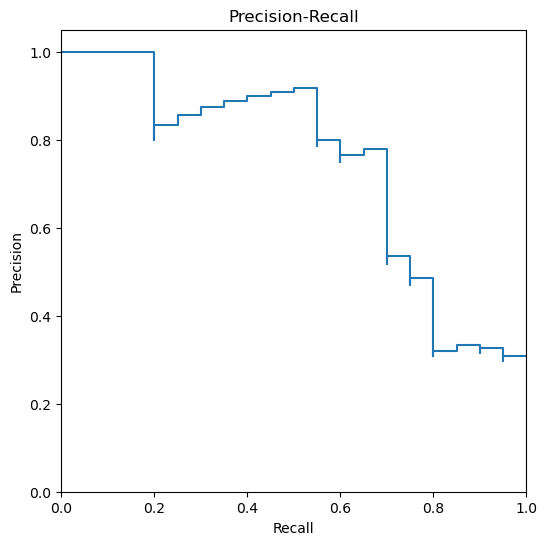

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show() 

# ROC-кривая

In [41]:
from sklearn.metrics import roc_auc_score 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8903225806451613


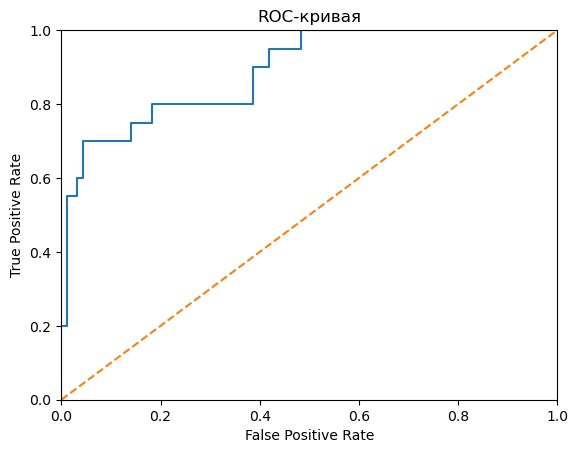

In [42]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#   установить границы осей от 0 до 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')
plt.show()

# Коэффициент детерминации

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('./data/data_from_sslv.csv')
df = df.drop(['Unnamed: 0','district','data_street','facilities'], axis=1)

train, valid = train_test_split(df, test_size=0.25, random_state=12345)

features_train = train.drop('price_eur', axis=1)
target_train = train['price_eur']
features_valid = valid.drop('price_eur', axis=1)
target_valid = valid['price_eur']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)


print("R2 =", r2_score(target_valid, predicted_valid))

R2 = 0.43201145407497965
